# 2. Data Preparation

a. Handle missing or erroneous data. <br>
b. Encode categorical variables appropriately. <br>
c. Normalize or standardize features as required. <br>
d. Split the data into training and testing sets to evaluate model performance. <br>

#### Importing the relevant modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

Numeric columns: ['Sender_Sector', 'USD_amount', 'Label']


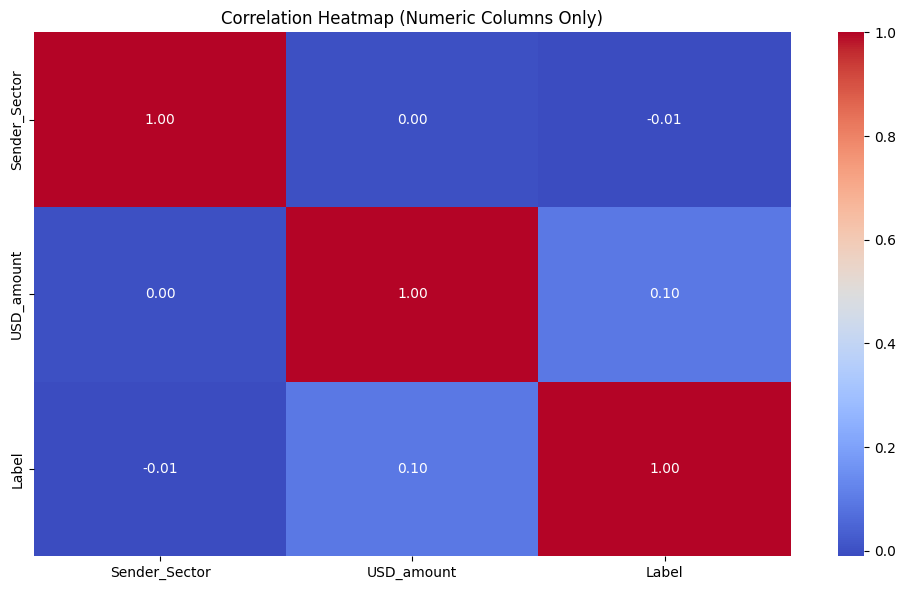

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np

df = pd.read_csv("dataset.csv")

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numeric columns: {list(numeric_cols)}")

# Correlation heatmap with only numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.tight_layout()
plt.show()

#### 2a. Handle missing or erroneous data. <br>

In [ ]:
csv_path = Path("dataset.csv")
df = pd.read_csv(csv_path)

# Total number of rows in the dataset with all the fields filled - No missing values
df_full = df.dropna()

print("Original shape:", df.shape)
print("Full rows shape:", df_full.shape)

Original shape: (20501, 15)
Full rows shape: (9531, 15)


In [8]:
# Total number of columns of the dataset having No row as missing
df.dropna(axis=1)

,Time_step
0,15/03/2022 10:24
1,15/03/2022 10:24
2,15/03/2022 10:24
3,15/03/2022 10:24
4,15/03/2022 10:24
...,...
20496,17/06/2024 11:54
20497,17/06/2024 12:04
20498,17/06/2024 12:14
20499,


In [11]:
df.Sender_Id.isna().sum()

np.int64(2953)

In [10]:
df.isna().sum()

Time_step              0
Transaction_Id         2
Sender_Id           2953
Sender_Account      2953
Sender_Country      2953
Sender_Gender       3886
Sender_Sector       2953
Sender_lob          2953
Bene_Id             2969
Bene_Account        2969
Bene_Country        2969
Bene_Gender         3887
USD_amount             2
Label                  2
Transaction_Type       2
dtype: int64

In [4]:
# 0) Split target / features
target_col = "Label"
x = df.drop(columns=[target_col])
y = df[target_col]

In [12]:
# 0) Handle missing values in target first
target_col = "Label"
x = df.drop(columns=[target_col])
y = df[target_col]

# Remove rows with missing target values
mask = ~y.isna()
x_clean = x[mask]
y_clean = y[mask]

print(f"After cleaning target:")
print(f"X shape: {x_clean.shape}")
print(f"y shape: {y_clean.shape}")
print(f"Target distribution:\n{y_clean.value_counts()}")

# 1) Defining column selectors for categorising into numerical and categorical
num_col = selector(dtype_include=["int64", "float64"])(x_clean)  # Apply selector to data
cat_col = selector(dtype_include=["object","category",'bool'])(x_clean)  # Apply selector to data

print(f"Numerical columns: {num_col}")
print(f"Categorical columns: {cat_col}")

# 2) Preprocessing the dataset : imputing -> encoding/scaling
num_pipe = Pipeline(steps= [
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline(steps= [
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),  # Fixed strategy
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_col),
        ("cat", cat_pipe, cat_col)
    ],
    remainder="drop"
)

# 3) Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

print(f"Training set: {x_train.shape}")
print(f"Test set: {x_test.shape}")

After cleaning target:
X shape: (20499, 14)
y shape: (20499,)
Target distribution:
Label
0.0    20107
1.0      392
Name: count, dtype: int64
Numerical columns: ['Sender_Sector', 'USD_amount']
Categorical columns: ['Time_step', 'Transaction_Id', 'Sender_Id', 'Sender_Account', 'Sender_Country', 'Sender_Gender', 'Sender_lob', 'Bene_Id', 'Bene_Account', 'Bene_Country', 'Bene_Gender', 'Transaction_Type']
Training set: (16399, 14)
Test set: (4100, 14)
